In [10]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(r"sets CLEANED.csv")

In [11]:
print(data.head())
print(data.dtypes)

  Set_ID            Name  Year      Theme Theme_Group         Subtheme  \
0   75-1   PreSchool Set  1975  PreSchool  Pre-school  {Not specified}   
1   77-1   PreSchool Set  1975  PreSchool  Pre-school  {Not specified}   
2  077-1  Pre-School Set  1975      Duplo  Pre-school  {Not specified}   
3   78-1   PreSchool Set  1975  PreSchool  Pre-school  {Not specified}   
4   78-3       Basic Set  1975  Samsonite     Vintage        Basic set   

  Category        Packaging     Availability  Pieces  Minifigures Owned  \
0   Normal  {Not specified}  {Not specified}    16.0          0.0  10.0   
1   Normal  {Not specified}  {Not specified}    20.0          0.0  11.0   
2   Normal  {Not specified}  {Not specified}    21.0          0.0  10.0   
3   Normal  {Not specified}  {Not specified}    32.0          0.0   8.0   
4   Normal              Box  {Not specified}   330.0          0.0  10.0   

   Rating  Price  Resale_Price  
0     0.0    0.0           0.0  
1     0.0    0.0           0.0  
2    

In [12]:
# Encode categorical variables
label = preprocessing.LabelEncoder()

# Assuming 'Theme' and 'Theme_Group' are the categorical fields we want to encode
data['Theme'] = label.fit_transform(data['Theme'].astype(str))
data['Theme_Group'] = label.fit_transform(data['Theme_Group'].astype(str))

# Check for missing values and handle them (drop rows with missing values in this example)
data = data.dropna()

# Inspect the data types again
print(data.dtypes)

Set_ID           object
Name             object
Year              int64
Theme             int64
Theme_Group       int64
Subtheme         object
Category         object
Packaging        object
Availability     object
Pieces          float64
Minifigures     float64
Owned            object
Rating          float64
Price           float64
Resale_Price    float64
dtype: object


In [13]:
# Select features and target variable
# Here we use 'Theme', 'Theme_Group', 'Pieces', 'Minifigures', 'Price' to predict 'Resale_Price'
features = ['Theme', 'Theme_Group', 'Pieces', 'Minifigures', 'Price']
target = 'Resale_Price'

# Create feature and target datasets
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)

In [14]:
# Build the model
reg = LinearRegression().fit(X_train, y_train)

# Predict on the test set
y_pred = reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 8567.574787900068
R-squared: 0.272338439593646


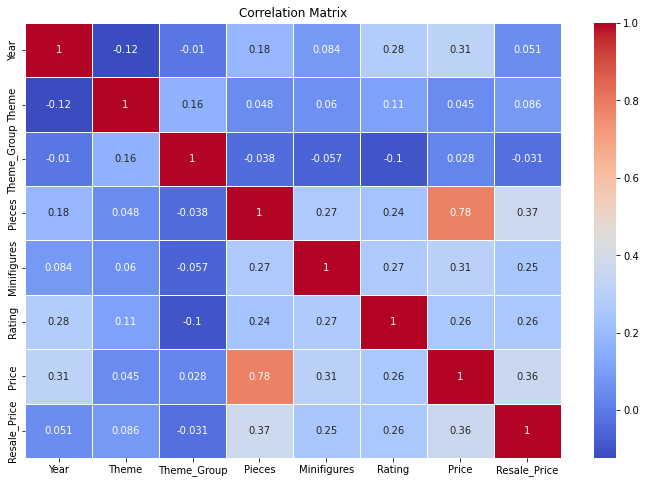

In [15]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()